In [81]:
import numpy as np
import pandas as pd

# Data

In [82]:
df = pd.read_csv('/kaggle/input/dataset/Sales_data_training.csv')
df.head(10)

,date,store,item,sales,supplier_id,supplier_lead_time,stock_on_hand,stock_reorder_level,replenishment_lead_time,day_of_week,restocked_store,restocked_inventory
0,2013-01-01,1,1,13,1,9,61,49,3,1,15,0
1,2013-01-02,1,1,11,1,6,71,46,1,2,11,0
2,2013-01-03,1,1,14,1,13,66,23,2,3,18,0
3,2013-01-04,1,1,13,1,10,86,37,1,4,14,0
4,2013-01-05,1,1,10,1,7,114,43,2,5,14,1
5,2013-01-06,1,1,12,1,9,153,47,4,6,11,0
6,2013-01-07,1,1,10,1,12,173,36,3,0,13,0
7,2013-01-08,1,1,9,1,5,85,45,1,1,10,0
8,2013-01-09,1,1,12,1,9,98,27,4,2,11,0
9,2013-01-10,1,1,9,1,13,136,31,1,3,6,0


In [83]:
df.shape

(730500, 12)

In [84]:
df.columns

Index(['date', 'store', 'item', 'sales', 'supplier_id', 'supplier_lead_time',
       'stock_on_hand', 'stock_reorder_level', 'replenishment_lead_time',
       'day_of_week', 'restocked_store', 'restocked_inventory'],
      dtype='object')

# EDA
Objective: Understand the data, identify patterns, and detect anomalies.

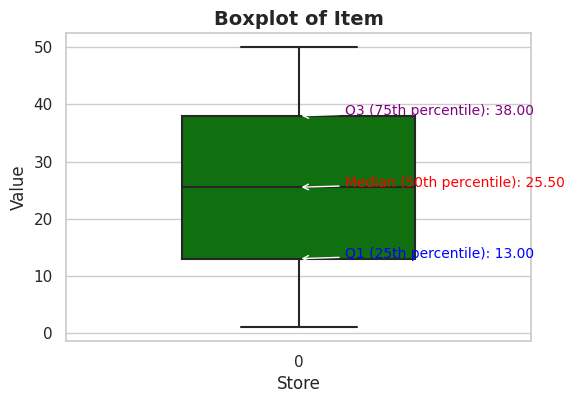

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visuals
sns.set(style="whitegrid")

# Create a figure with larger size
plt.figure(figsize=(6, 4))

# Create the boxplot
ax = sns.boxplot(data=df['item'], color='green', width=0.5, fliersize=6)

# Title with enhanced font size and style
plt.title("Boxplot of Item", fontsize=14, fontweight='bold')

# Labeling the axis
plt.xlabel("Store", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Calculate the quartiles and outliers
Q1 = np.percentile(df['item'], 25)
Q2 = np.percentile(df['item'], 50)
Q3 = np.percentile(df['item'], 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Annotate the quartiles and whiskers
# Annotate with different font colors
ax.annotate(f'Q1 (25th percentile): {Q1:.2f}', xy=(0, Q1), xytext=(0.1, Q1+0.1),
            arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10, color='blue')
ax.annotate(f'Median (50th percentile): {Q2:.2f}', xy=(0, Q2), xytext=(0.1, Q2+0.1),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color='red')
ax.annotate(f'Q3 (75th percentile): {Q3:.2f}', xy=(0, Q3), xytext=(0.1, Q3+0.1),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color='purple')
ax.annotate(f'Lower Whisker: {lower_whisker:.2f}', xy=(0, lower_whisker), xytext=(0.1, lower_whisker-0.1),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color='red')
ax.annotate(f'Upper Whisker: {upper_whisker:.2f}', xy=(0, upper_whisker), xytext=(0.1, upper_whisker+0.1),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color='red')


# Show the plot
plt.show()

### Univarient analysis

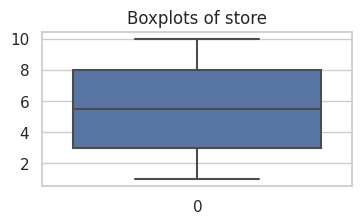

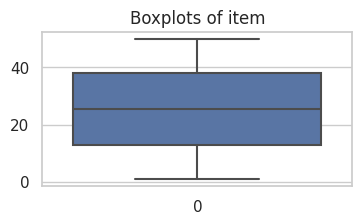

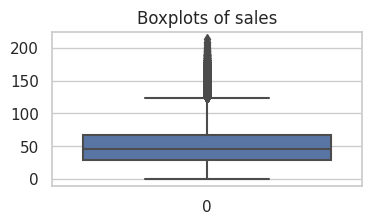

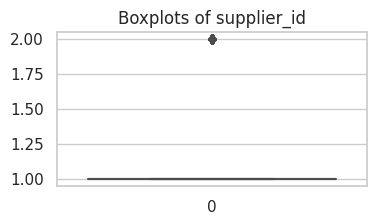

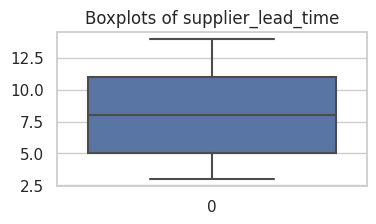

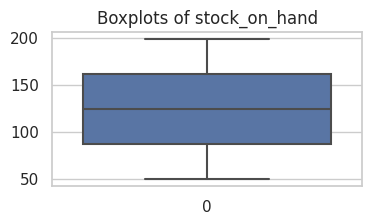

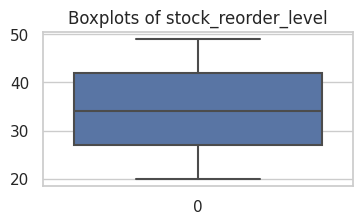

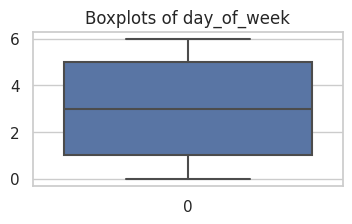

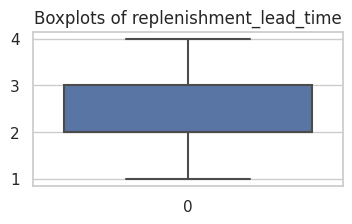

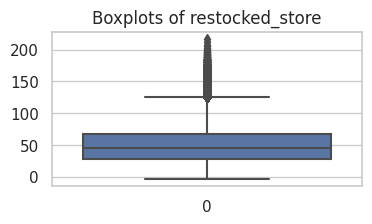

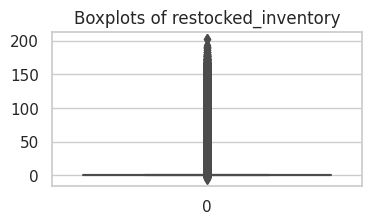

In [86]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=df['store'])
plt.title("Boxplots of store")
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(data=df['item'])
plt.title("Boxplots of item")
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(data=df['sales'])
plt.title("Boxplots of sales")
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(data=df['supplier_id'])
plt.title("Boxplots of supplier_id")
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(data=df['supplier_lead_time'])
plt.title("Boxplots of supplier_lead_time")
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(data=df['stock_on_hand'])
plt.title("Boxplots of stock_on_hand")
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(data=df['stock_reorder_level'])
plt.title("Boxplots of stock_reorder_level")
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(data=df['day_of_week'])
plt.title("Boxplots of day_of_week")
plt.show()


plt.figure(figsize=(4, 2))
sns.boxplot(data=df['replenishment_lead_time'])
plt.title("Boxplots of replenishment_lead_time")
plt.show()


plt.figure(figsize=(4, 2))
sns.boxplot(data=df['restocked_store'])
plt.title("Boxplots of restocked_store")
plt.show()

plt.figure(figsize=(4, 2))
sns.boxplot(data=df['restocked_inventory'])
plt.title("Boxplots of restocked_inventory")
plt.show()

## Heatmap
multicollinearity detection

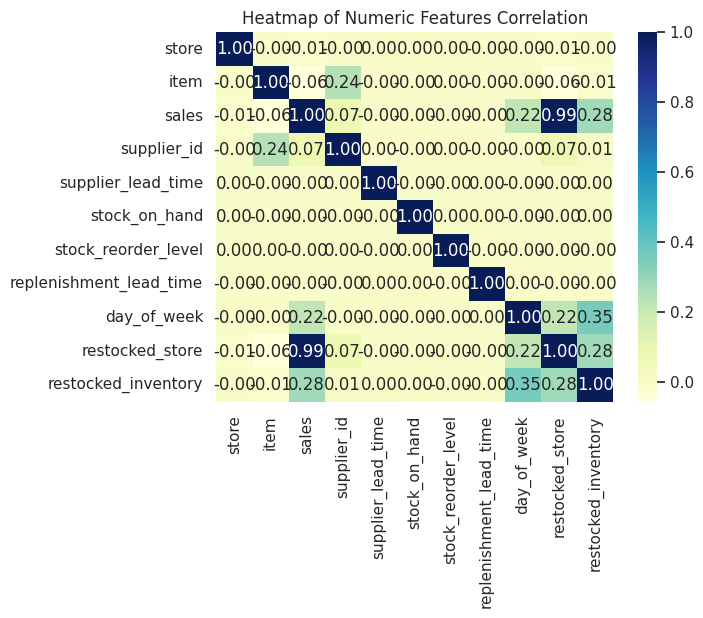

In [87]:
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap with a new colormap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu")  # Yellow-Green-Blue
plt.title('Heatmap of Numeric Features Correlation')
plt.show()

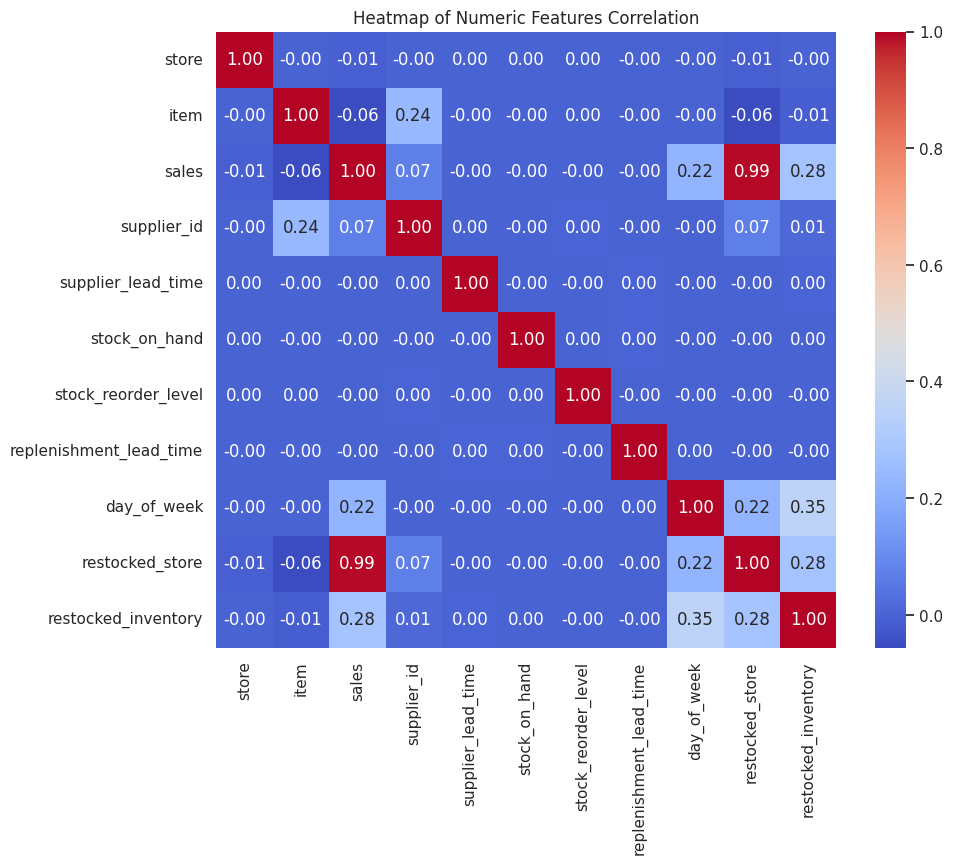

In [88]:
plt.figure(figsize=(10, 8))

# Plot the heatmap with the "coolwarm" colormap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")  # Red-White-Blue
plt.title('Heatmap of Numeric Features Correlation')
plt.show()

## Distribution Plot

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


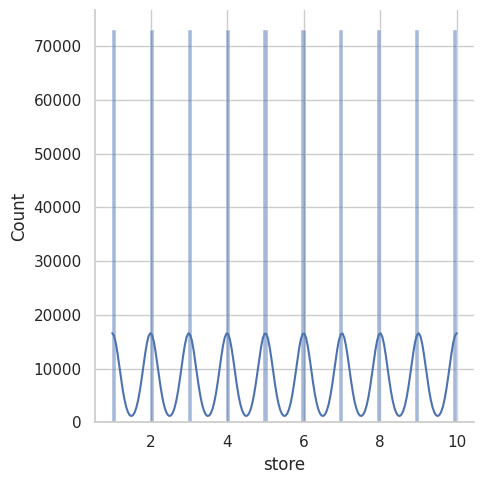

In [89]:
sns.displot(df['store'],kde=True)

<ipython-input-90-b0a34750cf5f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['item'],kde = True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='item', ylabel='Density'>

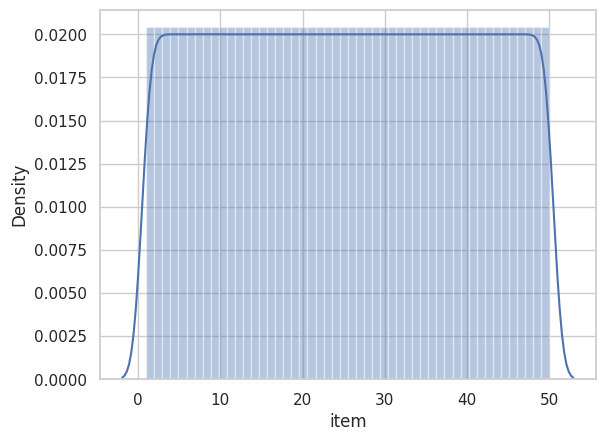

In [90]:
sns.distplot(df['item'],kde = True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sales', ylabel='Count'>

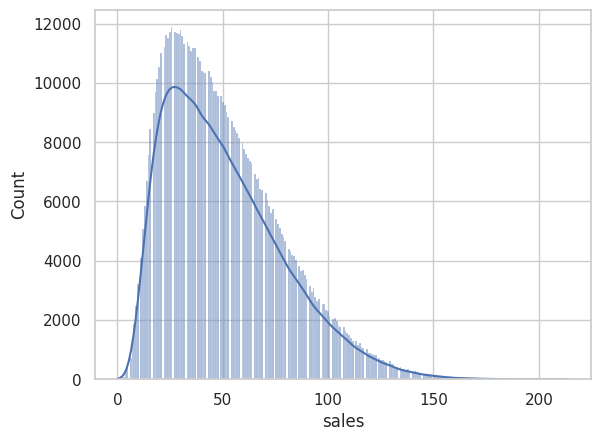

In [91]:
sns.histplot(df['sales'],kde= True)

<ipython-input-92-4b7a06016381>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['supplier_id'],kde = True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='supplier_id', ylabel='Density'>

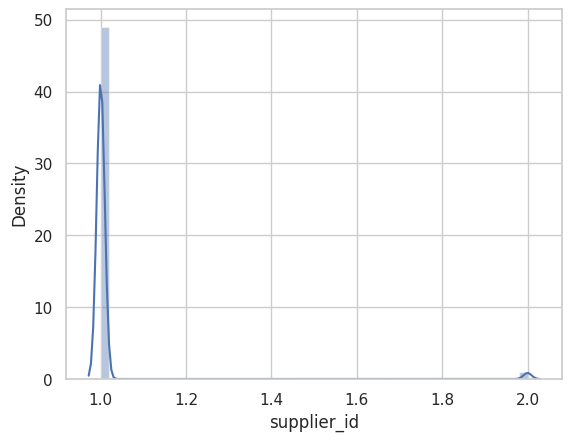

In [92]:
sns.distplot(df['supplier_id'],kde = True)

<ipython-input-93-18a83363b194>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['supplier_lead_time'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='supplier_lead_time', ylabel='Density'>

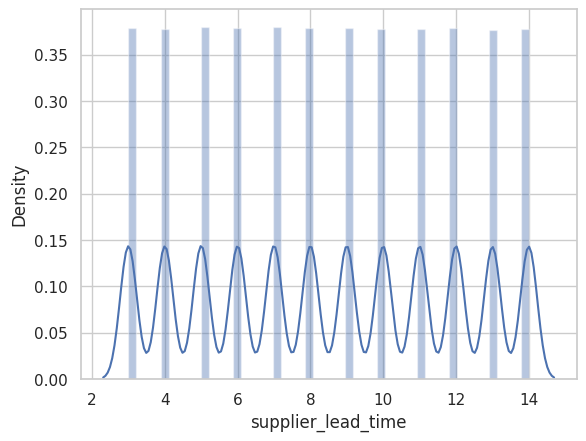

In [93]:
sns.distplot(df['supplier_lead_time'])

<ipython-input-94-12bd3decf267>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stock_on_hand'],kde=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stock_on_hand', ylabel='Density'>

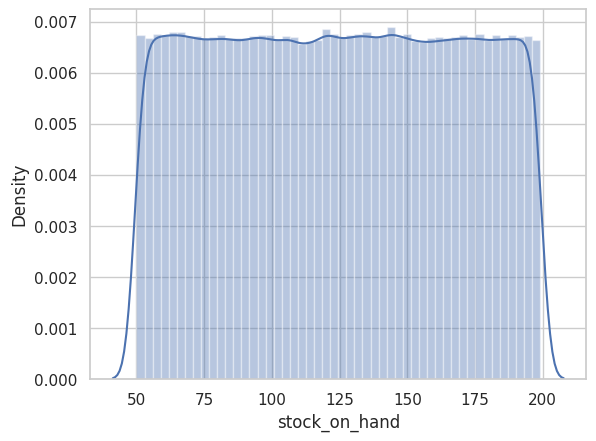

In [94]:
sns.distplot(df['stock_on_hand'],kde=True)

<ipython-input-95-0de94324ae10>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stock_reorder_level'],kde= True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stock_reorder_level', ylabel='Density'>

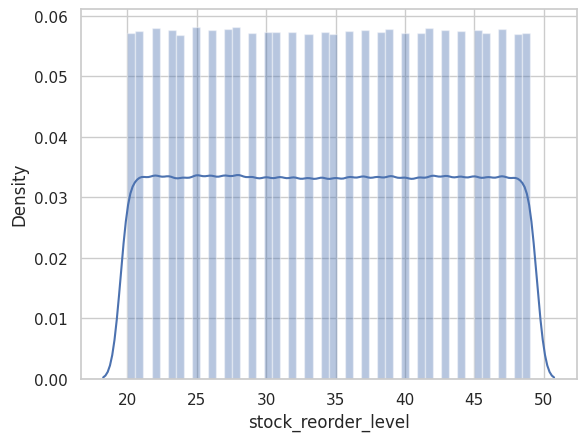

In [95]:
sns.distplot(df['stock_reorder_level'],kde= True)

<ipython-input-96-aa3398879ada>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['replenishment_lead_time'],kde = True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='replenishment_lead_time', ylabel='Density'>

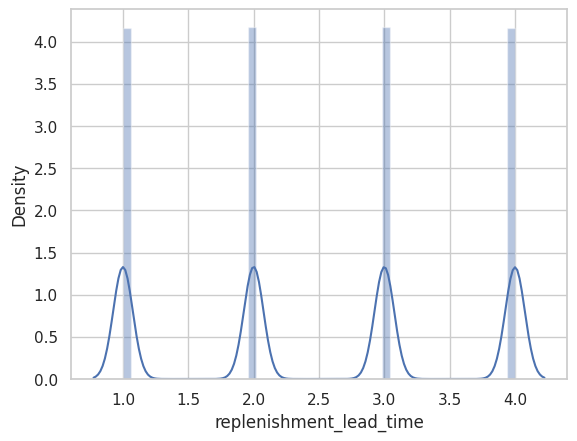

In [96]:
sns.distplot(df['replenishment_lead_time'],kde = True)

<ipython-input-97-ffea33885cdd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['day_of_week'],kde= True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='day_of_week', ylabel='Density'>

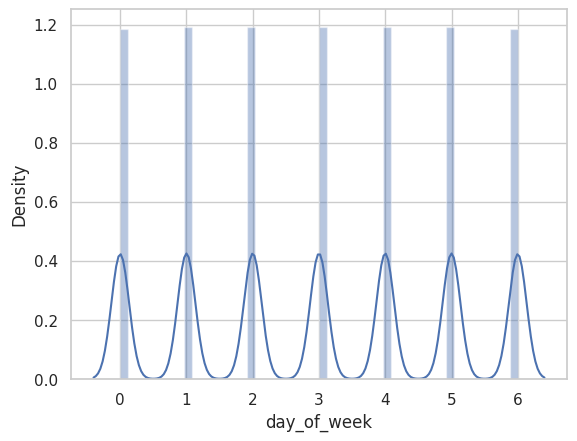

In [97]:
sns.distplot(df['day_of_week'],kde= True)

<ipython-input-98-1a8f66bae702>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['restocked_store'],kde= True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='restocked_store', ylabel='Density'>

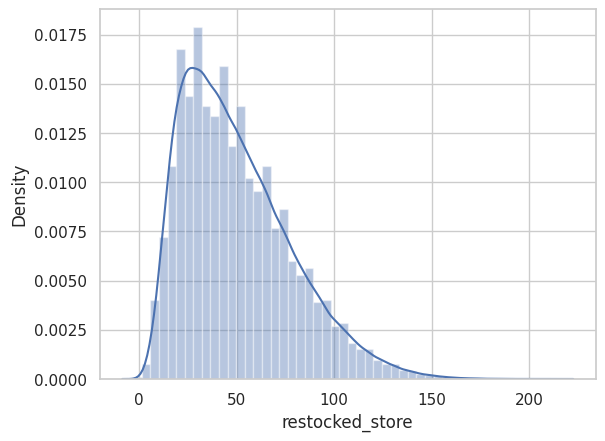

In [98]:
sns.distplot(df['restocked_store'],kde= True)

<ipython-input-99-24c01409b884>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['restocked_inventory'],kde= True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='restocked_inventory', ylabel='Density'>

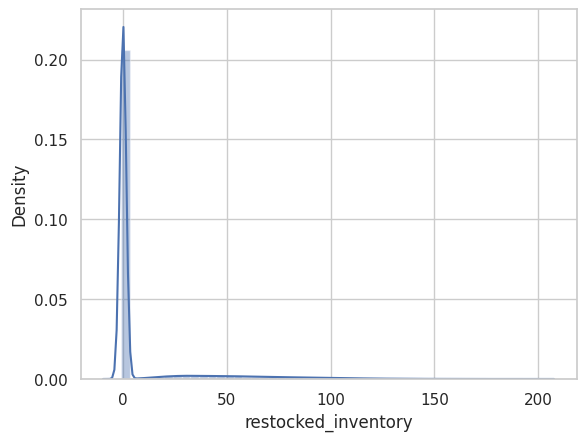

In [99]:
sns.distplot(df['restocked_inventory'],kde= True)

# Data Cleaning

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730500 entries, 0 to 730499
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   date                     730500 non-null  object
 1   store                    730500 non-null  int64 
 2   item                     730500 non-null  int64 
 3   sales                    730500 non-null  int64 
 4   supplier_id              730500 non-null  int64 
 5   supplier_lead_time       730500 non-null  int64 
 6   stock_on_hand            730500 non-null  int64 
 7   stock_reorder_level      730500 non-null  int64 
 8   replenishment_lead_time  730500 non-null  int64 
 9   day_of_week              730500 non-null  int64 
 10  restocked_store          730500 non-null  int64 
 11  restocked_inventory      730500 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 66.9+ MB


In [101]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
730495    False
730496    False
730497    False
730498    False
730499    False
Length: 730500, dtype: bool

In [102]:
df.duplicated().sum()

0

In [103]:
df.isnull()

,date,store,item,sales,supplier_id,supplier_lead_time,stock_on_hand,stock_reorder_level,replenishment_lead_time,day_of_week,restocked_store,restocked_inventory
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
730495,False,False,False,False,False,False,False,False,False,False,False,False
730496,False,False,False,False,False,False,False,False,False,False,False,False
730497,False,False,False,False,False,False,False,False,False,False,False,False
730498,False,False,False,False,False,False,False,False,False,False,False,False


In [104]:
df.isnull().sum()

date                       0
store                      0
item                       0
sales                      0
supplier_id                0
supplier_lead_time         0
stock_on_hand              0
stock_reorder_level        0
replenishment_lead_time    0
day_of_week                0
restocked_store            0
restocked_inventory        0
dtype: int64

### It has no missing values and no duplicates

In [105]:
df['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [106]:
df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [107]:
df['supplier_id'].unique()

array([1, 2])

In [108]:
df['day_of_week'].unique()

array([1, 2, 3, 4, 5, 6, 0])

In [109]:
df['replenishment_lead_time'].unique()

array([3, 1, 2, 4])

In [110]:
df['store'].value_counts()

store
1     73050
2     73050
3     73050
4     73050
5     73050
6     73050
7     73050
8     73050
9     73050
10    73050
Name: count, dtype: int64

In [111]:
df['item'].value_counts()

item
1     14610
38    14610
28    14610
29    14610
30    14610
31    14610
32    14610
33    14610
34    14610
35    14610
36    14610
37    14610
39    14610
2     14610
40    14610
41    14610
42    14610
43    14610
44    14610
45    14610
46    14610
47    14610
48    14610
49    14610
27    14610
26    14610
25    14610
24    14610
3     14610
4     14610
5     14610
6     14610
7     14610
8     14610
9     14610
10    14610
11    14610
12    14610
13    14610
14    14610
15    14610
16    14610
17    14610
18    14610
19    14610
20    14610
21    14610
22    14610
23    14610
50    14610
Name: count, dtype: int64

In [112]:
df[['store','item']].value_counts()

store  item
1      1       1461
7      30      1461
       43      1461
       42      1461
       41      1461
               ... 
4      12      1461
       11      1461
       10      1461
       9       1461
10     50      1461
Name: count, Length: 500, dtype: int64

# Feature Extraction

In [113]:
df.shape

(730500, 12)

In [114]:
df['date']

0         2013-01-01
1         2013-01-02
2         2013-01-03
3         2013-01-04
4         2013-01-05
             ...    
730495    2016-12-27
730496    2016-12-28
730497    2016-12-29
730498    2016-12-30
730499    2016-12-31
Name: date, Length: 730500, dtype: object

In [115]:
# convert date to datetime formate
from datetime import datetime
df['date']

0         2013-01-01
1         2013-01-02
2         2013-01-03
3         2013-01-04
4         2013-01-05
             ...    
730495    2016-12-27
730496    2016-12-28
730497    2016-12-29
730498    2016-12-30
730499    2016-12-31
Name: date, Length: 730500, dtype: object

In [116]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
730495   2016-12-27
730496   2016-12-28
730497   2016-12-29
730498   2016-12-30
730499   2016-12-31
Name: date, Length: 730500, dtype: datetime64[ns]

In [117]:
df['day'] = df['date'].dt.day 
df['month'] = df['date'].dt.month 
df['year'] = df['date'].dt.year

In [118]:
print(df['day'])

0          1
1          2
2          3
3          4
4          5
          ..
730495    27
730496    28
730497    29
730498    30
730499    31
Name: day, Length: 730500, dtype: int32


In [119]:
df.head(2)

,date,store,item,sales,supplier_id,supplier_lead_time,stock_on_hand,stock_reorder_level,replenishment_lead_time,day_of_week,restocked_store,restocked_inventory,day,month,year
0,2013-01-01,1,1,13,1,9,61,49,3,1,15,0,1,1,2013
1,2013-01-02,1,1,11,1,6,71,46,1,2,11,0,2,1,2013


## Data for neural network

In [120]:
x_data_neural = df[['store', 'item', 'supplier_id', 'supplier_lead_time',
       'stock_on_hand', 'stock_reorder_level', 'replenishment_lead_time',
       'day_of_week', 'restocked_store', 'restocked_inventory', 'day', 'month',
       'year']]
y_data_neural = df['sales']

In [121]:
print(x_data_neural.shape)
print(y_data_neural.shape)

(730500, 13)
(730500,)


### Calculate moving average for different 5 days, 10 days and 15 days

In [122]:
df['5_day_moving_avg'] = df.groupby(['store', 'item'])['sales'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
df['10_day_moving_avg'] = df.groupby(['store', 'item'])['sales'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
df['15_day_moving_avg'] = df.groupby(['store', 'item'])['sales'].transform(lambda x: x.rolling(window=15, min_periods=1).mean())

print(df['5_day_moving_avg'].shape)
print(df['10_day_moving_avg'].shape)
print(df['15_day_moving_avg'].shape)

(730500,)
(730500,)
(730500,)


In [123]:
df['5_day_moving_avg'].head(20)

0     13.000000
1     12.000000
2     12.666667
3     12.750000
4     12.200000
5     12.000000
6     11.800000
7     10.800000
8     10.600000
9     10.400000
10     9.800000
11     9.200000
12     9.400000
13     9.400000
14     8.600000
15     8.200000
16    10.000000
17     9.400000
18    10.600000
19    12.600000
Name: 5_day_moving_avg, dtype: float64

In [124]:
df['10_day_moving_avg'].head(20)

0     13.000000
1     12.000000
2     12.666667
3     12.750000
4     12.200000
5     12.166667
6     11.857143
7     11.500000
8     11.555556
9     11.300000
10    10.900000
11    10.500000
12    10.100000
13    10.000000
14     9.500000
15     9.000000
16     9.600000
17     9.400000
18    10.000000
19    10.600000
Name: 10_day_moving_avg, dtype: float64

In [125]:
df['15_day_moving_avg'].head(20)

0     13.000000
1     12.000000
2     12.666667
3     12.750000
4     12.200000
5     12.166667
6     11.857143
7     11.500000
8     11.555556
9     11.300000
10    11.090909
11    10.750000
12    10.692308
13    10.785714
14    10.400000
15    10.000000
16    10.333333
17     9.866667
18    10.200000
19    10.533333
Name: 15_day_moving_avg, dtype: float64

In [126]:
df.shape

(730500, 18)

In [127]:
# Lagged Sales: 1 day, 7 days, and 30 days lag
df['sales_lag_1'] = df.groupby(['store', 'item'])['sales'].shift(1)
df['sales_lag_7'] = df.groupby(['store', 'item'])['sales'].shift(7)
df['sales_lag_30'] = df.groupby(['store', 'item'])['sales'].shift(30)

# Stock Turnover Ratio
df['stock_turnover_ratio'] = df['sales'] / (df['stock_on_hand'] + 1e-5)  # Avoid division by zero

# Days Until Stockout
df['days_until_stockout'] = df['stock_on_hand'] / (df['5_day_moving_avg'] + 1e-5)

# Days Since Last Restock
df['days_since_last_restock'] = (df['date'] - df.groupby(['store', 'item'])['date'].shift()).dt.days.fillna(0)

# Stock-to-Sales Ratio
df['stock_to_sales_ratio'] = df['stock_on_hand'] / (df['sales'] + 1e-5)

# Supplier Reliability Index (lead time variance)
df['supplier_lead_time_variance'] = df.groupby('supplier_id')['supplier_lead_time'].transform('std').fillna(0)

# Weekend/Weekday Indicator
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 6 else 0)

# Cumulative Sales: Monthly
df['cumulative_sales'] = df.groupby(['store', 'item', 'year', 'month'])['sales'].cumsum()

# Reorder Frequency
df['reorder_frequency'] = df.groupby(['store', 'item'])['restocked_inventory'].transform(lambda x: x.rolling(window=30, min_periods=1).sum())

# Stock Shortage Indicator
df['stock_shortage'] = ((df['stock_on_hand'] < df['stock_reorder_level']) | (df['stock_on_hand'] <= 0)).astype(int)

# Drop rows with missing values generated due to lagging
df.dropna(inplace=True)

In [128]:
df.isnull().sum()

date                           0
store                          0
item                           0
sales                          0
supplier_id                    0
supplier_lead_time             0
stock_on_hand                  0
stock_reorder_level            0
replenishment_lead_time        0
day_of_week                    0
restocked_store                0
restocked_inventory            0
day                            0
month                          0
year                           0
5_day_moving_avg               0
10_day_moving_avg              0
15_day_moving_avg              0
sales_lag_1                    0
sales_lag_7                    0
sales_lag_30                   0
stock_turnover_ratio           0
days_until_stockout            0
days_since_last_restock        0
stock_to_sales_ratio           0
supplier_lead_time_variance    0
is_weekend                     0
cumulative_sales               0
reorder_frequency              0
stock_shortage                 0
dtype: int

In [129]:
df.columns

Index(['date', 'store', 'item', 'sales', 'supplier_id', 'supplier_lead_time',
       'stock_on_hand', 'stock_reorder_level', 'replenishment_lead_time',
       'day_of_week', 'restocked_store', 'restocked_inventory', 'day', 'month',
       'year', '5_day_moving_avg', '10_day_moving_avg', '15_day_moving_avg',
       'sales_lag_1', 'sales_lag_7', 'sales_lag_30', 'stock_turnover_ratio',
       'days_until_stockout', 'days_since_last_restock',
       'stock_to_sales_ratio', 'supplier_lead_time_variance', 'is_weekend',
       'cumulative_sales', 'reorder_frequency', 'stock_shortage'],
      dtype='object')

In [130]:
columns = ['store', 'item', 'supplier_id', 'supplier_lead_time',
       'stock_on_hand', 'stock_reorder_level', 'replenishment_lead_time',
       'day_of_week', 'restocked_store', 'restocked_inventory', 'day', 'month',
       'year', '5_day_moving_avg', '10_day_moving_avg', '15_day_moving_avg',
       'sales_lag_1', 'sales_lag_7', 'sales_lag_30', 'stock_turnover_ratio',
       'days_until_stockout', 'days_since_last_restock',
       'stock_to_sales_ratio', 'supplier_lead_time_variance', 'is_weekend',
       'cumulative_sales', 'reorder_frequency', 'stock_shortage']
columns

['store',
 'item',
 'supplier_id',
 'supplier_lead_time',
 'stock_on_hand',
 'stock_reorder_level',
 'replenishment_lead_time',
 'day_of_week',
 'restocked_store',
 'restocked_inventory',
 'day',
 'month',
 'year',
 '5_day_moving_avg',
 '10_day_moving_avg',
 '15_day_moving_avg',
 'sales_lag_1',
 'sales_lag_7',
 'sales_lag_30',
 'stock_turnover_ratio',
 'days_until_stockout',
 'days_since_last_restock',
 'stock_to_sales_ratio',
 'supplier_lead_time_variance',
 'is_weekend',
 'cumulative_sales',
 'reorder_frequency',
 'stock_shortage']

In [131]:
x_data = df[columns]
x_data

,store,item,supplier_id,supplier_lead_time,stock_on_hand,stock_reorder_level,replenishment_lead_time,day_of_week,restocked_store,restocked_inventory,...,sales_lag_30,stock_turnover_ratio,days_until_stockout,days_since_last_restock,stock_to_sales_ratio,supplier_lead_time_variance,is_weekend,cumulative_sales,reorder_frequency,stock_shortage
30,1,1,1,14,99,22,4,3,13,0,...,13.0,0.131313,9.705873,1.0,7.615379,3.450055,0,328,30.0,0
31,1,1,1,11,163,25,2,4,14,0,...,11.0,0.067485,16.299984,1.0,14.818168,3.450055,0,11,30.0,0
32,1,1,1,3,168,27,3,5,16,15,...,14.0,0.125000,13.999988,1.0,7.999996,3.450055,0,32,45.0,0
33,1,1,1,13,71,24,3,6,13,0,...,13.0,0.211268,5.144924,1.0,4.733330,3.450055,1,47,45.0,0
34,1,1,1,13,149,30,1,0,12,0,...,10.0,0.093960,10.067561,1.0,10.642850,3.450055,0,61,44.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730495,10,50,2,5,97,41,1,1,59,0,...,106.0,0.618557,1.544586,1.0,1.616666,3.459836,0,1684,279.0,0
730496,10,50,2,5,70,21,4,2,40,0,...,74.0,0.614286,1.194539,1.0,1.627907,3.459836,0,1727,279.0,0
730497,10,50,2,12,68,40,3,3,70,0,...,84.0,1.000000,1.148648,1.0,1.000000,3.459836,0,1795,279.0,0
730498,10,50,2,14,85,39,4,4,61,0,...,74.0,0.741176,1.440678,1.0,1.349206,3.459836,0,1858,279.0,0


In [132]:
y_data = df['sales']
y_data

30        13
31        11
32        21
33        15
34        14
          ..
730495    60
730496    43
730497    68
730498    63
730499    64
Name: sales, Length: 715500, dtype: int64

In [133]:
print(x_data.shape)
print(y_data.shape)

(715500, 28)
(715500,)


## Data Split

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state = 42)

In [136]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(572400, 28)
(572400,)
(143100, 28)
(143100,)


In [137]:
print(x_train.dtypes)

store                            int64
item                             int64
supplier_id                      int64
supplier_lead_time               int64
stock_on_hand                    int64
stock_reorder_level              int64
replenishment_lead_time          int64
day_of_week                      int64
restocked_store                  int64
restocked_inventory              int64
day                              int32
month                            int32
year                             int32
5_day_moving_avg               float64
10_day_moving_avg              float64
15_day_moving_avg              float64
sales_lag_1                    float64
sales_lag_7                    float64
sales_lag_30                   float64
stock_turnover_ratio           float64
days_until_stockout            float64
days_since_last_restock        float64
stock_to_sales_ratio           float64
supplier_lead_time_variance    float64
is_weekend                       int64
cumulative_sales         

## Normalization

When using XGBoost, normalization is generally not required because XGBoost is a tree-based algorithm.

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
scaler = MinMaxScaler()

In [140]:
x_train_Norm = scaler.fit_transform(x_train)
x_test_Norm = scaler.transform(x_test)

In [141]:
print(x_train.shape)
print(x_train_Norm.shape)
print(x_test.shape)
print(x_test_Norm.shape)

(572400, 28)
(572400, 28)
(143100, 28)
(143100, 28)


In [142]:
print(type(x_train))
print(type(x_train_Norm.shape))

<class 'pandas.core.frame.DataFrame'>
<class 'tuple'>


In [143]:
x_train.columns

Index(['store', 'item', 'supplier_id', 'supplier_lead_time', 'stock_on_hand',
       'stock_reorder_level', 'replenishment_lead_time', 'day_of_week',
       'restocked_store', 'restocked_inventory', 'day', 'month', 'year',
       '5_day_moving_avg', '10_day_moving_avg', '15_day_moving_avg',
       'sales_lag_1', 'sales_lag_7', 'sales_lag_30', 'stock_turnover_ratio',
       'days_until_stockout', 'days_since_last_restock',
       'stock_to_sales_ratio', 'supplier_lead_time_variance', 'is_weekend',
       'cumulative_sales', 'reorder_frequency', 'stock_shortage'],
      dtype='object')

In [144]:
x_train_Norm = pd.DataFrame(x_train_Norm, columns=['store', 'item', 'supplier_id', 'supplier_lead_time',
       'stock_on_hand', 'stock_reorder_level', 'replenishment_lead_time',
       'day_of_week', 'restocked_store', 'restocked_inventory', 'day', 'month',
       'year', '5_day_moving_avg', '10_day_moving_avg', '15_day_moving_avg',
       'sales_lag_1', 'sales_lag_7', 'sales_lag_30', 'stock_turnover_ratio',
       'days_until_stockout', 'days_since_last_restock',
       'stock_to_sales_ratio', 'supplier_lead_time_variance', 'is_weekend',
       'cumulative_sales', 'reorder_frequency', 'stock_shortage'])

x_test_Norm = pd.DataFrame(x_test_Norm, columns=['store', 'item', 'supplier_id', 'supplier_lead_time',
       'stock_on_hand', 'stock_reorder_level', 'replenishment_lead_time',
       'day_of_week', 'restocked_store', 'restocked_inventory', 'day', 'month',
       'year', '5_day_moving_avg', '10_day_moving_avg', '15_day_moving_avg',
       'sales_lag_1', 'sales_lag_7', 'sales_lag_30', 'stock_turnover_ratio',
       'days_until_stockout', 'days_since_last_restock',
       'stock_to_sales_ratio', 'supplier_lead_time_variance', 'is_weekend',
       'cumulative_sales', 'reorder_frequency', 'stock_shortage'])

In [145]:
x_train_Norm.head(5)

,store,item,supplier_id,supplier_lead_time,stock_on_hand,stock_reorder_level,replenishment_lead_time,day_of_week,restocked_store,restocked_inventory,...,sales_lag_30,stock_turnover_ratio,days_until_stockout,days_since_last_restock,stock_to_sales_ratio,supplier_lead_time_variance,is_weekend,cumulative_sales,reorder_frequency,stock_shortage
0,0.111111,0.693878,0.0,0.363636,0.885906,0.310345,0.000000,0.000000,0.250000,0.024038,...,0.266355,0.077352,0.070360,0.0,2.083915e-07,0.0,0.0,0.038462,0.260406,0.0
1,0.444444,0.102041,0.0,0.909091,0.268456,0.344828,1.000000,0.166667,0.181818,0.024038,...,0.247664,0.119618,0.038400,0.0,1.285854e-07,0.0,0.0,0.015587,0.207044,0.0
2,0.666667,0.183673,0.0,0.000000,0.040268,0.793103,0.666667,1.000000,0.413636,0.024038,...,0.331776,0.414063,0.014072,0.0,2.472310e-08,0.0,1.0,0.016194,0.369264,0.0
3,0.222222,0.346939,0.0,0.000000,0.073826,0.689655,0.000000,1.000000,0.586364,0.024038,...,0.471963,0.592811,0.005706,0.0,1.200045e-08,0.0,1.0,0.336235,0.640342,0.0
4,0.888889,0.306122,0.0,0.181818,0.442953,0.724138,1.000000,0.833333,0.140909,0.153846,...,0.098131,0.059492,0.112370,0.0,2.761998e-07,0.0,0.0,0.107692,0.164354,0.0


In [146]:
x_test_Norm.head(5)

,store,item,supplier_id,supplier_lead_time,stock_on_hand,stock_reorder_level,replenishment_lead_time,day_of_week,restocked_store,restocked_inventory,...,sales_lag_30,stock_turnover_ratio,days_until_stockout,days_since_last_restock,stock_to_sales_ratio,supplier_lead_time_variance,is_weekend,cumulative_sales,reorder_frequency,stock_shortage
0,0.666667,0.816327,0.0,0.818182,0.785235,0.965517,0.666667,0.000000,0.077273,0.024038,...,0.074766,0.018182,0.320457,0.0,9.434027e-07,0.0,0.0,0.049595,0.089648,0.0
1,0.555556,0.836735,0.0,0.363636,0.114094,0.103448,0.666667,1.000000,0.190909,0.024038,...,0.177570,0.156561,0.037173,0.0,9.412125e-08,0.0,1.0,0.193927,0.236926,0.0
2,0.777778,0.918367,0.0,0.909091,0.369128,0.379310,0.000000,0.833333,0.459091,0.475962,...,0.285047,0.255010,0.023960,0.0,5.104003e-08,0.0,0.0,0.377935,0.443970,0.0
3,1.000000,0.387755,0.0,0.636364,0.154362,0.413793,1.000000,0.333333,0.240909,0.024038,...,0.289720,0.200414,0.023251,0.0,6.970358e-08,0.0,0.0,0.228745,0.311633,0.0
4,0.777778,0.673469,0.0,0.363636,0.570470,0.206897,0.000000,0.666667,0.140909,0.024038,...,0.051402,0.061343,0.166963,0.0,2.673390e-07,0.0,0.0,0.005263,0.108858,0.0


In [147]:
x_train.isnull().sum()

store                          0
item                           0
supplier_id                    0
supplier_lead_time             0
stock_on_hand                  0
stock_reorder_level            0
replenishment_lead_time        0
day_of_week                    0
restocked_store                0
restocked_inventory            0
day                            0
month                          0
year                           0
5_day_moving_avg               0
10_day_moving_avg              0
15_day_moving_avg              0
sales_lag_1                    0
sales_lag_7                    0
sales_lag_30                   0
stock_turnover_ratio           0
days_until_stockout            0
days_since_last_restock        0
stock_to_sales_ratio           0
supplier_lead_time_variance    0
is_weekend                     0
cumulative_sales               0
reorder_frequency              0
stock_shortage                 0
dtype: int64

In [148]:
x_test.isnull().sum()

store                          0
item                           0
supplier_id                    0
supplier_lead_time             0
stock_on_hand                  0
stock_reorder_level            0
replenishment_lead_time        0
day_of_week                    0
restocked_store                0
restocked_inventory            0
day                            0
month                          0
year                           0
5_day_moving_avg               0
10_day_moving_avg              0
15_day_moving_avg              0
sales_lag_1                    0
sales_lag_7                    0
sales_lag_30                   0
stock_turnover_ratio           0
days_until_stockout            0
days_since_last_restock        0
stock_to_sales_ratio           0
supplier_lead_time_variance    0
is_weekend                     0
cumulative_sales               0
reorder_frequency              0
stock_shortage                 0
dtype: int64

In [149]:
print(x_train.shape)
print(x_test.shape)

(572400, 28)
(143100, 28)


## Model

### XG Boost

In [150]:
import xgboost as xgb
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score
import joblib

xgb_regressor = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)
xgb_regressor.fit(x_train_Norm,y_train)
y_pred = xgb_regressor.predict(x_test_Norm)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

print(y_pred)

RMSE: 0.557172643512289
MAE: 0.3684213292040582
[ 11.388601  37.34341   97.0012   ... 114.88898   35.41189   39.058163]


In [151]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
import numpy as np

# Assuming the model is already trained
y_pred = xgb_regressor.predict(x_test_Norm)

# Calculate regression metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Adjusted R2
n = len(y_test)  # number of data points
p = x_train_Norm.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Max Error
from sklearn.metrics import max_error
max_err = max_error(y_test, y_pred)

# Create a DataFrame to display the results in a beautiful table
results = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MSE', 'R²', 'Adjusted R²', 'Explained Variance', 'MAPE', 'Max Error'],
    'Value': [rmse, mae, mse, r2, adj_r2, evs, mape, max_err]
})

# Styling the table for better visuals with increased size
styled_results = results.style.applymap(lambda val: 'background-color: lightblue' if isinstance(val, (int, float)) else '',
                                        subset=['Value']) \
                             .set_table_styles([
                                 {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), 
                                                                     ('color', 'white'), 
                                                                     ('font-size', '16px')]},
                                 {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2'), 
                                                                                  ('font-size', '18px')]},
                                 {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#e6f7ff'), 
                                                                                   ('font-size', '18px')]},
                                 {'selector': 'table', 'props': [('font-size', '16px'), 
                                                                 ('width', '80%'), 
                                                                 ('border-collapse', 'collapse')]},
                                 {'selector': 'th', 'props': [('padding', '12px')]},
                                 {'selector': 'td', 'props': [('padding', '12px')]}
                             ])

# Display the colorful table
styled_results

<ipython-input-151-fec879270543>:33: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_results = results.style.applymap(lambda val: 'background-color: lightblue' if isinstance(val, (int, float)) else '',


,Metric,Value
0,RMSE,0.557173
1,MAE,0.368421
2,MSE,0.310441
3,R²,0.999599
4,Adjusted R²,0.999599
5,Explained Variance,0.999599
6,MAPE,0.866598
7,Max Error,7.469147


In [152]:
y_test

594250     11
607650     38
668549     97
291335     53
492416     30
         ... 
699472     24
52109      19
355536    118
602016     36
83991      39
Name: sales, Length: 143100, dtype: int64

In [153]:
## Save the model:
import joblib

joblib.dump(xgb_regressor, 'xgboost_inventory_model.joblib')

['xgboost_inventory_model.joblib']

# Test_data_2017

In [154]:
new_dataa.head()

NameError: name 'new_dataa' is not defined

In [ ]:
import pandas as pd
import joblib

# Load the saved model
xgb_regressor_2017 = joblib.load('xgboost_inventory_model.joblib')

# Load the new data for prediction
new_dataa = pd.read_csv('/kaggle/input/dataset/data_2017_validation.csv')

In [ ]:
new_dataa.shape

In [ ]:
df_2017 = new_dataa

In [ ]:
df_2017['date'] = df_2017['date'].str.replace('"', '', regex=False)

In [ ]:
from datetime import datetime
df_2017['date'] = pd.to_datetime(df_2017['date'])
df_2017['day'] = df_2017['date'].dt.day 
df_2017['month'] = df_2017['date'].dt.month 
df_2017['year'] = df_2017['date'].dt.year 
df_2017['5_day_moving_avg'] = df_2017.groupby(['store', 'item'])['sales'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
df_2017['10_day_moving_avg'] = df_2017.groupby(['store', 'item'])['sales'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
df_2017['15_day_moving_avg'] = df_2017.groupby(['store', 'item'])['sales'].transform(lambda x: x.rolling(window=15, min_periods=1).mean())

print(df_2017['5_day_moving_avg'].shape)
print(df_2017['10_day_moving_avg'].shape)
print(df_2017['15_day_moving_avg'].shape)
# Lagged Sales: 1 day, 7 days, and 30 days lag
df_2017['sales_lag_1'] = df_2017.groupby(['store', 'item'])['sales'].shift(1)
df_2017['sales_lag_7'] = df_2017.groupby(['store', 'item'])['sales'].shift(7)
df_2017['sales_lag_30'] = df_2017.groupby(['store', 'item'])['sales'].shift(30)

# Stock Turnover Ratio
df_2017['stock_turnover_ratio'] = df_2017['sales'] / (df_2017['stock_on_hand'] + 1e-5)  # Avoid division by zero

# Days Until Stockout
df_2017['days_until_stockout'] = df_2017['stock_on_hand'] / (df_2017['5_day_moving_avg'] + 1e-5)

# Days Since Last Restock
df_2017['days_since_last_restock'] = (df_2017['date'] - df_2017.groupby(['store', 'item'])['date'].shift()).dt.days.fillna(0)

# Stock-to-Sales Ratio
df_2017['stock_to_sales_ratio'] = df_2017['stock_on_hand'] / (df_2017['sales'] + 1e-5)

# Supplier Reliability Index (lead time variance)
df_2017['supplier_lead_time_variance'] = df_2017.groupby('supplier_id')['supplier_lead_time'].transform('std').fillna(0)

# Weekend/Weekday Indicator
df_2017['is_weekend'] = df_2017['day_of_week'].apply(lambda x: 1 if x >= 6 else 0)

# Cumulative Sales: Monthly
df_2017['cumulative_sales'] = df_2017.groupby(['store', 'item', 'year', 'month'])['sales'].cumsum()

# Reorder Frequency
df_2017['reorder_frequency'] = df_2017.groupby(['store', 'item'])['restocked_inventory'].transform(lambda x: x.rolling(window=30, min_periods=1).sum())

# Stock Shortage Indicator
df_2017['stock_shortage'] = ((df_2017['stock_on_hand'] < df_2017['stock_reorder_level']) | (df_2017['stock_on_hand'] <= 0)).astype(int)

# Drop rows with missing values generated due to lagging
df_2017.dropna(inplace=True)


df_2017.columns

In [ ]:
columns = ['store', 'item', 'supplier_id', 'supplier_lead_time',
       'stock_on_hand', 'stock_reorder_level', 'replenishment_lead_time',
       'day_of_week', 'restocked_store', 'restocked_inventory', 'day', 'month',
       'year', '5_day_moving_avg', '10_day_moving_avg', '15_day_moving_avg',
       'sales_lag_1', 'sales_lag_7', 'sales_lag_30', 'stock_turnover_ratio',
       'days_until_stockout', 'days_since_last_restock',
       'stock_to_sales_ratio', 'supplier_lead_time_variance', 'is_weekend',
       'cumulative_sales', 'reorder_frequency', 'stock_shortage']
columns

In [ ]:
x_2017 = df_2017[columns]
x_2017

In [ ]:
y_2017 = df_2017['sales']
y_2017

## Normalization of 2017 data

In [ ]:
x_2017_Norm = scaler.transform(x_2017)
print(x_2017_Norm.shape)

In [ ]:
x_2017.columns

In [ ]:
x_2017_Norm = pd.DataFrame(x_2017_Norm, columns=['store', 'item', 'supplier_id', 'supplier_lead_time',
       'stock_on_hand', 'stock_reorder_level', 'replenishment_lead_time',
       'day_of_week', 'restocked_store', 'restocked_inventory', 'day', 'month',
       'year', '5_day_moving_avg', '10_day_moving_avg', '15_day_moving_avg',
       'sales_lag_1', 'sales_lag_7', 'sales_lag_30', 'stock_turnover_ratio',
       'days_until_stockout', 'days_since_last_restock',
       'stock_to_sales_ratio', 'supplier_lead_time_variance', 'is_weekend',
       'cumulative_sales', 'reorder_frequency', 'stock_shortage'])

In [ ]:
# Perform predictions
new_dataa['predicted_sales'] = xgb_regressor.predict(x_2017_Norm)
new_dataa['predicted_sales']

In [ ]:
new_dataa.to_csv('data_2017_with_predictions.csv', index=False)
print("Prediction completed and saved to 'data_2017_with_predictions.csv'.")

In [ ]:
new_dataa.shape

In [ ]:
new_dataa['stock_shortage'].value_counts()

# Understock model

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score
import xgboost as xgb
import joblib

df['restocked_inventory'] = pd.to_numeric(df['restocked_inventory'], errors='coerce')

print(df.info())
# Target Columns
target_sales = 'sales'
target_understock = 'stock_shortage'

# Splitting data for sales forecasting
X_sales = df[columns]
y_sales = df[target_sales]

# Train-test split
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X_sales, y_sales, test_size=0.2, random_state=42)

# XGBoost for Sales Prediction
sales_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=10, learning_rate=0.1)
sales_model.fit(X_train_sales, y_train_sales)

# Save the sales model
joblib.dump(sales_model, 'xgboost_sales_model.joblib')

# Predict and evaluate Sales
sales_predictions = sales_model.predict(X_test_sales)
rmse = np.sqrt(mean_squared_error(y_test_sales, sales_predictions))
mae = mean_absolute_error(y_test_sales, sales_predictions)

print(f"Sales Forecasting - RMSE: {rmse}, MAE: {mae}")

# Splitting data for understock prediction
X_understock = df[columns]
y_understock = df[target_understock]

# Train-test split
X_train_understock, X_test_understock, y_train_understock, y_test_understock = train_test_split(X_understock, y_understock, test_size=0.2, random_state=42)

# XGBoost for Understock Prediction (Classification)
understock_model = xgb.XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1)
understock_model.fit(X_train_understock, y_train_understock)

# Save the understock model
joblib.dump(understock_model, 'xgboost_understock_model.joblib')

# Predict and evaluate Understock
understock_predictions = understock_model.predict(X_test_understock)
understock_accuracy = accuracy_score(y_test_understock, understock_predictions)

print(f"Understock Prediction - Accuracy: {understock_accuracy}")

# Prediction

In [ ]:
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

# Load saved sales and understock models
sales_model = joblib.load('xgboost_sales_model.joblib')
understock_model = joblib.load('xgboost_understock_model.joblib')



df_2017['restocked_inventory'] = pd.to_numeric(df_2017['restocked_inventory'], errors='coerce')

# Predict Sales using the saved model
X_2017 = df_2017[columns]
df_2017['predicted_sales'] = sales_model.predict(X_2017)

# Predict Understock Risk using the saved model
df_2017['understock_risk'] = understock_model.predict(X_2017)


print("Predicted data saved as 'df_2017_with_predictions_final.csv'.")

rmse = np.sqrt(mean_squared_error(df_2017['sales'], df_2017['predicted_sales']))
mae = mean_absolute_error(df_2017['sales'], df_2017['predicted_sales'])

print(f"Sales Prediction - RMSE: {rmse}, MAE: {mae}")

understock_cases = df_2017[df_2017['understock_risk'] == 1]
overstock_cases = df_2017[df_2017['stock_on_hand'] > df_2017['predicted_sales']]

# Save the new data with predictions to a CSV file
df_2017[['date', 'store', 'item', 'sales', 'predicted_sales', 'understock_risk']].to_csv('df_2017_with_predictions_final.csv', index=False)

optimal_reorder_points = df_2017.groupby(['store', 'item'])['stock_reorder_level'].mean()

print(f"Understock Cases Count: {understock_cases.shape[0]}")
print(f"Overstock Cases Count: {overstock_cases.shape[0]}")
print(f"Optimal Reorder Points by Product/Store Combination:\n{optimal_reorder_points}")

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
correlation_matrix = df_2017[['sales', 'stock_on_hand', 'stock_reorder_level', 'predicted_sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Sales and Understock Risk by Store
plt.figure(figsize=(12, 8))
store_analysis = df_2017.groupby('store').agg({'sales': 'sum', 'understock_risk': 'sum'}).reset_index()
sns.barplot(x='store', y='sales', data=store_analysis, color='blue', label='Sales')
sns.barplot(x='store', y='understock_risk', data=store_analysis, color='red', label='Understock Risk')
plt.title('Sales and Understock Risk by Store')
plt.xlabel('Store')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Predicted Sales vs Actual Sales for Specific Items
specific_items = df_2017[df_2017['item'].isin([1,2])]  # Choose items of interest
plt.figure(figsize=(10, 6))
sns.scatterplot(data=specific_items, x='sales', y='predicted_sales', hue='item', style='item', palette='deep')
plt.title('Predicted Sales vs Actual Sales for Specific Items')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend(title='Item')
plt.show()

In [ ]:
# Plot original vs. predicted sales with improvements
plt.figure(figsize=(12, 8))

# Plot original and predicted sales
plt.plot(df_2017['date'], df_2017['sales'], label='Original Sales', color='steelblue', alpha=0.8)
plt.plot(df_2017['date'], df_2017['predicted_sales'], label='Predicted Sales', color='darkorange', linestyle='--')

# Adding title and labels with improved clarity
plt.title('Comparison of Original and Predicted Sales Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display a grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Adding a legend to distinguish between original and predicted sales
plt.legend(title='Sales', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate residuals
df_2017['residuals'] = df_2017['sales'] - df_2017['predicted_sales']

# Plot Residuals
plt.figure(figsize=(12, 8))
plt.scatter(df_2017['date'], df_2017['residuals'], color='darkviolet', alpha=0.7, edgecolor='black')

# Adding title and labels
plt.title('Residuals (Actual Sales - Predicted Sales) Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Residuals (Sales Difference)', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Display a grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the confidence intervals (for demonstration, let's assume a constant margin of error)
df_2017['upper_bound'] = df_2017['predicted_sales'] + 50  # Assuming margin of error of 50
df_2017['lower_bound'] = df_2017['predicted_sales'] - 50

# Plot Actual vs Predicted Sales with Confidence Intervals
plt.figure(figsize=(12, 8))
plt.plot(df_2017['date'], df_2017['sales'], label='Actual Sales', color='blue', alpha=0.6)
plt.plot(df_2017['date'], df_2017['predicted_sales'], label='Predicted Sales', color='red', linestyle='--')
plt.fill_between(df_2017['date'], df_2017['lower_bound'], df_2017['upper_bound'], color='gray', alpha=0.2, label='Confidence Interval')
plt.title('Actual vs Predicted Sales with Confidence Interval', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Calculate Percentage Error
df_2017['percentage_error'] = (df_2017['residuals'] / df_2017['sales']) * 100

# Plot Percentage Error
plt.figure(figsize=(12, 8))
plt.plot(df_2017['date'], df_2017['percentage_error'], color='purple', alpha=0.7)
plt.title('Percentage Error Between Actual and Predicted Sales Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Error (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Extract day of the week and month for analysis
df_2017['day_of_week'] = df_2017['date'].dt.dayofweek
df_2017['month'] = df_2017['date'].dt.month

# Pivot the data to create a heatmap-friendly format
sales_pivot = df_2017.pivot_table(values='sales', index='day_of_week', columns='month', aggfunc='mean')

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Average Sales'})
plt.title('Heatmap of Sales by Day of the Week and Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)
plt.show()

In [156]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# -------------------------
# Custom Transformers
# -------------------------

# Transformer for Feature Engineering
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Ensure the date column is in datetime format
        # Explicitly specify the date format
        X['date'] = pd.to_datetime(X['date'], format='%Y-%m-%d', errors='coerce')
        
        # Extract day, month, and year
        X['day'] = X['date'].dt.day
        X['month'] = X['date'].dt.month
        X['year'] = X['date'].dt.year

        # Moving Averages
        X['5_day_moving_avg'] = X.groupby(['store', 'item'])['sales'].transform(lambda x: x.rolling(5, 1).mean())
        X['10_day_moving_avg'] = X.groupby(['store', 'item'])['sales'].transform(lambda x: x.rolling(10, 1).mean())
        X['15_day_moving_avg'] = X.groupby(['store', 'item'])['sales'].transform(lambda x: x.rolling(15, 1).mean())

        # Lag Features
        X['sales_lag_1'] = X.groupby(['store', 'item'])['sales'].shift(1)
        X['sales_lag_7'] = X.groupby(['store', 'item'])['sales'].shift(7)
        X['sales_lag_30'] = X.groupby(['store', 'item'])['sales'].shift(30)

        # Derived Features
        X['stock_turnover_ratio'] = X['sales'] / (X['stock_on_hand'] + 1e-5)
        X['days_until_stockout'] = X['stock_on_hand'] / (X['5_day_moving_avg'] + 1e-5)
        X['days_since_last_restock'] = (X['date'] - X.groupby(['store', 'item'])['date'].shift()).dt.days.fillna(0)
        X['stock_to_sales_ratio'] = X['stock_on_hand'] / (X['sales'] + 1e-5)
        X['supplier_lead_time_variance'] = X.groupby('supplier_id')['supplier_lead_time'].transform('std').fillna(0)
        X['is_weekend'] = X['day_of_week'].apply(lambda x: 1 if x >= 6 else 0)
        X['cumulative_sales'] = X.groupby(['store', 'item', 'year', 'month'])['sales'].cumsum()
        X['reorder_frequency'] = X.groupby(['store', 'item'])['restocked_inventory'].transform(lambda x: x.rolling(30, 1).sum())
        X['stock_shortage'] = ((X['stock_on_hand'] < X['stock_reorder_level']) | (X['stock_on_hand'] <= 0)).astype(int)

        # Drop rows with missing values caused by lag features
        X = X.dropna()

        return X

# Transformer for Selecting Features and Target
class SelectFeaturesTarget(BaseEstimator, TransformerMixin):
    def __init__(self, features, target):
        self.features = features
        self.target = target

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.features], X[self.target]

# -------------------------
# Define the Pipeline
# -------------------------

# Features to use
columns = [
    'store', 'item', 'supplier_id', 'supplier_lead_time', 'stock_on_hand',
    'stock_reorder_level', 'replenishment_lead_time', 'day_of_week',
    'restocked_store', 'restocked_inventory', 'day', 'month', 'year',
    '5_day_moving_avg', '10_day_moving_avg', '15_day_moving_avg',
    'sales_lag_1', 'sales_lag_7', 'sales_lag_30', 'stock_turnover_ratio',
    'days_until_stockout', 'days_since_last_restock', 'stock_to_sales_ratio',
    'supplier_lead_time_variance', 'is_weekend', 'cumulative_sales',
    'reorder_frequency', 'stock_shortage'
]
target = 'sales'

# Load Data
df = pd.read_csv('/kaggle/input/dataset/data_2017_validation.csv')  # Replace with your file path

# Pipeline Steps
pipeline = Pipeline([
    ('feature_engineering', FeatureEngineering()),
    ('select_features', SelectFeaturesTarget(features=columns, target=target))
])

# -------------------------
# Split Data and Train Model
# -------------------------

# Apply Pipeline
X, y = pipeline.fit_transform(df)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_regressor = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)
xgb_regressor.fit(x_train, y_train)

# -------------------------
# Evaluate the Model
# -------------------------
y_pred = xgb_regressor.predict(x_test)

# Model Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# -------------------------
# Save the Model
# -------------------------
#joblib.dump(xgb_regressor, 'xgboost_inventory_model.joblib')
#print("Model saved successfully!")


# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)


# Output RMSE and MAE
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 0.81
R² Score: 1.00
RMSE: 0.8064019282687869
MAE: 0.5477275659646561
